# Ridge Regression

In [36]:
"""
The optimal solution of w from problem 3 in the written assignment is implemented to find the model weight 
of this ridge regression problem (in the train function).

The mean_rmse function includes the overall logic, which does the training, cross-validation, 
and returns the mean RMSE for train and validation sets.
"""

'\nThe optimal solution of w from problem 3 in the written assignment is implemented to find the model weight \nof this ridge regression problem (in the train function).\n\nThe mean_rmse function includes the overall logic, which does the training, cross-validation, \nand returns the mean RMSE for train and validation sets.\n'

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
def read_data(path):
    data = np.genfromtxt(path, delimiter=',', skip_header=1)
    
    return data

In [39]:
def shuffle_and_partition(data):
    """
    Randomly shuffle the data by rows, and ones are inserted to the first column.
    Then split the data into 5 folds, which are saved into a dictionary.
    
    Return a dictionary containing shuffled and partitioned data points
    """
    np.random.shuffle(data)
    data = np.insert(data, 0, 1, axis=1) # Add ones to the first column
    X = data[:, 0:14]
    y = data[:, 14:15]
  
    X_shuffled = {}
    y_shuffled = {}
    for i in range(5):
        X_shuffled[i] = X[i*101 : (i + 1)*101]
        y_shuffled[i] = y[i*101 : (i + 1)*101]
  
    return X_shuffled, y_shuffled

In [40]:
def get_next_train_valid(X_shuffled, y_shuffled, itr):
    """
    Return the training set and the validation set according to current iteration number.
    """
    X_valid = X_shuffled[itr]
    y_valid = y_shuffled[itr]
    
    init = 0
    for j in range(5):
        if j!=itr:
            if not init:
                X_train = X_shuffled[j]
                y_train = y_shuffled[j]
                init = 1
            else:
                X_train = np.concatenate((X_train, X_shuffled[j]), axis=0)
                y_train = np.concatenate((y_train, y_shuffled[j]), axis=0)
  
    return X_train, y_train, X_valid, y_valid

In [54]:
def train(X_train, y_train, lamb):
    """
    Optimal solution from problem 3 in written assignment is used here.
    The model weight returned includes the model intercept which is the first column of the model weight
    """
    covariance_matrix = np.dot(np.transpose(X_train), X_train)
    model_weight = np.dot(np.dot(np.linalg.inv(covariance_matrix + np.identity(covariance_matrix.shape[0])*lamb), np.transpose(X_train)), y_train)
  
    return model_weight

In [55]:
def predict(X, model_weight):
    """
    Return the predicted label according to the feature vectors.
    """
    y_predict = np.dot(X, model_weight)
  
    return y_predict

In [62]:
def mean_rmse(X_shuffled, y_shuffled, lambdas):
    """
    This function takes the shuffled and partitioned dataset to do the cross-validation.
    Then it computes and returns the mean RMSE according to different lambdas of both training and validation sets.
    """
    # Create a list to store lambdas and the RMSE corresponds to it
    # First item is lambdas and the second one is the mean RMSE
    mean_rmse_train = [[0, 0] for i in range(len(lambdas))] 
    mean_rmse_valid = [[0, 0] for i in range(len(lambdas))]
    
    for i in range(len(lambdas)):
        mean_rmse_train[i][0] = lambdas[i]
        mean_rmse_valid[i][0] = lambdas[i]
        mean_rmse_train[i][1] = 0
        mean_rmse_valid[i][1] = 0 
        
        # Loop through 5 times to do cross-validation
        for itr in range(5):
            X_train, y_train, X_valid, y_valid = get_next_train_valid(X_shuffled, y_shuffled, itr) # Get the train and validation datasets in each iteration
            model_weight = train(X_train, y_train, lambdas[i]) # Find the model_weight in each iteration
            
            # Compute the RMSE in each iteration
            mean_rmse_train[i][1] += np.linalg.norm((predict(X_train, model_weight) - y_train))/len(y_train)
            mean_rmse_valid[i][1] += np.linalg.norm((predict(X_valid, model_weight) - y_valid))/len(y_valid)
        
        # Computes the mean RMSE
        mean_rmse_train[i][1] /= 5
        mean_rmse_valid[i][1] /= 5
    
    return mean_rmse_train, mean_rmse_valid

In [63]:
path = 'Housing.csv'
data = read_data(path) # Read the dataset
X_shuffled, y_shuffled = shuffle_and_partition(data) # Shuffle and partition the dataset into 5 folds
lambdas = np.around(np.linspace(0, 100, num=50), decimals=3) # Create 25 different lambdas for training
mean_rmse_train, mean_rmse_valid = mean_rmse(X_shuffled, y_shuffled, lambdas) # Do the cross-validation and retrun the mean RMSE correspond to different lambdas

# Save the output
pd.DataFrame(mean_rmse_train, columns=['lambda', 'RMSE']).to_csv('Housing_train_RMSE.csv', index=False, header=True)
pd.DataFrame(mean_rmse_valid, columns=['lambda', 'RMSE']).to_csv('Housing_valid_RMSE.csv', index=False, header=True)

In [64]:
print('Train RMSE')
pd.read_csv('Housing_train_RMSE.csv')

Train RMSE


,lambda,RMSE
0,0.000,0.230185
1,2.041,0.237454
2,4.082,0.239355
3,6.122,0.240216
4,8.163,0.240745
5,10.204,0.241129
6,12.245,0.241441
7,14.286,0.241711
8,16.327,0.241957
9,18.367,0.242188


In [65]:
print('Validation RMSE')
pd.read_csv('Housing_valid_RMSE.csv')

Validation RMSE


,lambda,RMSE
0,0.000,0.485869
1,2.041,0.493652
2,4.082,0.496483
3,6.122,0.497784
4,8.163,0.498612
5,10.204,0.499246
6,12.245,0.499788
7,14.286,0.500283
8,16.327,0.500754
9,18.367,0.501213


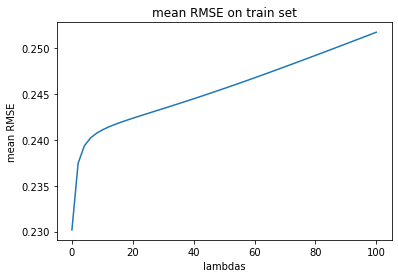

In [66]:
# RMSE plot for train set
mean_rmse_train_list = [mean_rmse_train[i][1] for i in range(len(lambdas))]
    
plt.plot(lambdas, mean_rmse_train_list)
plt.title('mean RMSE on train set')
plt.xlabel('lambdas')
plt.ylabel('mean RMSE')
plt.show()

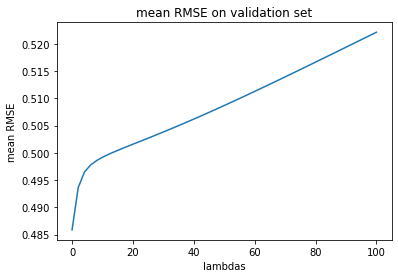

In [67]:
#RMSE plot for validartion set
mean_rmse_valid_list = [mean_rmse_valid[i][1] for i in range(len(lambdas))]

plt.plot(lambdas, mean_rmse_valid_list)
plt.title('mean RMSE on validation set')
plt.xlabel('lambdas')
plt.ylabel('mean RMSE')
plt.show()